In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

data_dir = '/content/content/MyDrive/data/titanic'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'gender_submission.csv',
 'test.csv',
 'titanic.zip',
 'test_1hot.csv',
 'train_1hot.csv']

# __Introduction to K-Nearest Neighbors__
- K-Nearest Neighbors (KNN) uses proximity to classify or predict outcomes for given data points.  
- It relies on distance metrics like Euclidean to analyze relationships between data point features.  
- KNN requires labeled data, assigning outcomes based on neighbors' categories or average values.  
- Classification involves assigning the most frequent class among neighbors; regression averages their outputs.  
- KNN is highly versatile, performing well in fraud detection, healthcare, and retail customer analysis.  
- Although intuitive and effective, KNN is computationally intensive for large datasets with high dimensionality.  

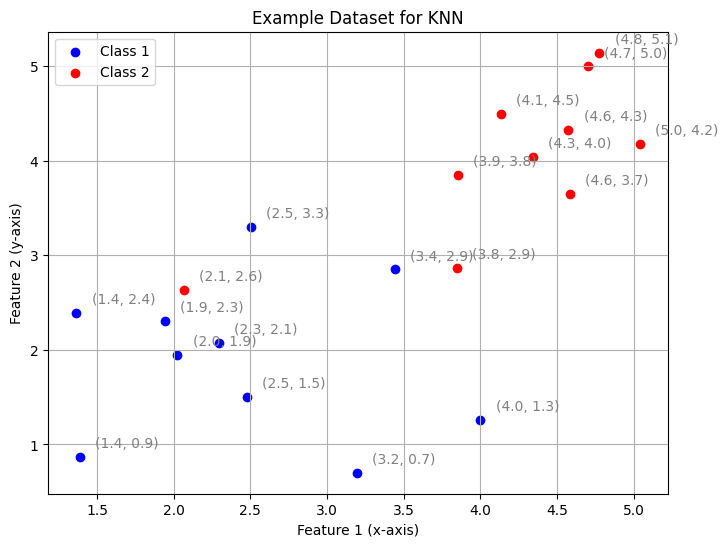

In [2]:
# Generate example data points for two classes
class_1 = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 10)
class_2 = np.random.multivariate_normal([4, 4], [[0.5, 0], [0, 0.5]], 10)

# Combine data points into a single dataset
data = np.vstack((class_1, class_2))

# Generate labels for each class (0 for class_1, 1 for class_2)
labels = np.array([0] * len(class_1) + [1] * len(class_2))

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class 2')

# Label each point with coordinates
for i, point in enumerate(data):
    plt.text(point[0] + 0.1, point[1] + 0.1, f'({point[0]:.1f}, {point[1]:.1f})', color='gray')

plt.title('Example Dataset for KNN')
plt.xlabel('Feature 1 (x-axis)')
plt.ylabel('Feature 2 (y-axis)')
plt.legend()
plt.grid(True)
plt.show()

# __Euclidean Distance formula__
- Euclidean distance is fundamental to KNN, measuring proximity between data points in feature space.  
- It computes straight-line distance using coordinate differences and square root of summed squares.  
- In KNN, this metric helps identify nearest neighbors, forming clusters based on proximity.  
- The formula is concise, often expressed as Euclidean norm to calculate magnitude between points.  
- Visualizing data in x-y space illustrates the relationships and distances between different points.  

__Euclidean distance illustration__
* The Euclidean distance formula is $ \mathbf{d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}} $
* Let $ \mathbf{a = (2, 3)} $ and $ \mathbf{b = (5, 7)} $ be two points.
* Substituting the values for $ \mathbf{a = (2, 3)} $ and $ \mathbf{b = (5, 7)}$, we have:
* $ \mathbf{d = \sqrt{(5 - 2)^2 + (7 - 3)^2}} $
* Simplifying further:
* $ \mathbf{d = \sqrt{3^2 + 4^2}} $
* $ \mathbf{d = \sqrt{9 + 16}} $
* $ \mathbf{d = \sqrt{25}} $
* $ \mathbf{d = 5} $
* Thus, the Euclidean distance between $ \mathbf{a = (2, 3)} $ and $ \mathbf{b = (5, 7)} $ is $ \mathbf{5} $.

* __Euclidean distance math notation__
  * $ \mathbf{||a - b||} $

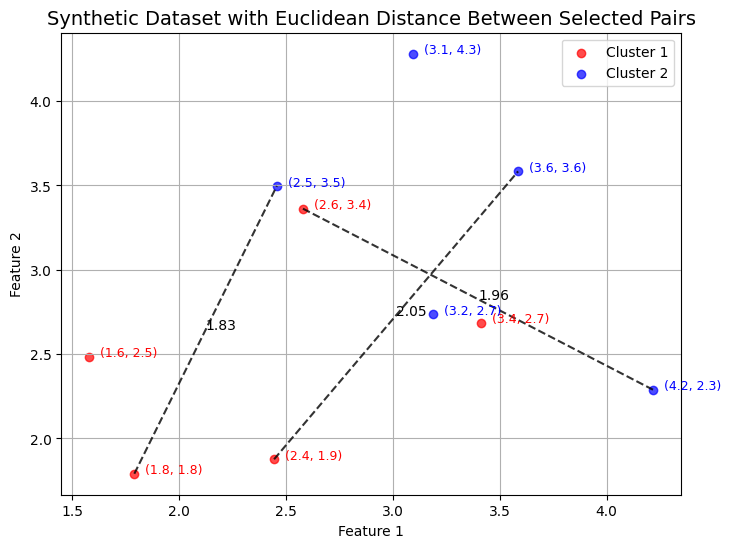

In [3]:
# Generate synthetic data with two clusters (5 points each)
np.random.seed(42)  # For reproducibility
cluster_1 = np.random.multivariate_normal([2, 2], [[0.8, 0], [0, 0.8]], size=5)
cluster_2 = np.random.multivariate_normal([4, 4], [[0.8, 0], [0, 0.8]], size=5)

# Combine the clusters into a single dataset
data = np.vstack((cluster_1, cluster_2))
labels = np.array([0] * 5 + [1] * 5)  # Labels to differentiate clusters

# Select specific pairs of points (non-intersecting connections)
selected_pairs = [(cluster_1[0], cluster_2[0]), (cluster_1[1], cluster_2[1]), (cluster_1[2], cluster_2[2])]

# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1', alpha=0.7)
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2', alpha=0.7)

# Label each point with its coordinates
for point in cluster_1:
    plt.text(point[0] + 0.05, point[1], f"({point[0]:.1f}, {point[1]:.1f})", fontsize=9, color='red')
for point in cluster_2:
    plt.text(point[0] + 0.05, point[1], f"({point[0]:.1f}, {point[1]:.1f})", fontsize=9, color='blue')

# Calculate and plot distances between selected pairs
for pair in selected_pairs:
    point_a, point_b = pair
    plt.plot([point_a[0], point_b[0]], [point_a[1], point_b[1]], 'k--', alpha=0.8)  # Connect points with dashed line
    distance = np.sqrt((point_b[0] - point_a[0])**2 + (point_b[1] - point_a[1])**2)  # Euclidean distance
    mid_x = (point_a[0] + point_b[0]) / 2
    mid_y = (point_a[1] + point_b[1]) / 2
    plt.text(mid_x, mid_y, f"{distance:.2f}", fontsize=10, color='black')  # Display distance near the line

# Add plot details
plt.title("Synthetic Dataset with Euclidean Distance Between Selected Pairs", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# __KNN algorithm__
- K-Nearest Neighbors (KNN) starts with labeled data to group similar points by categories.  
- It calculates distances for unlabeled points, identifying the "K" nearest neighbors in feature space.  
- For classification, KNN assigns the most common label among neighbors to the new point.  
- Regression tasks use KNN to calculate the average value of neighbors as the prediction.  
- Choosing an optimal value for K and scaling features ensures accurate and robust performance.  
- Scikit-learn’s KNeighborsClassifier simplifies KNN implementation, offering flexibility to tune parameters like K.  
- The algorithm achieves about 80% accuracy on Titanic data, balancing local patterns and generalization.  

In [4]:
df_train_1hot = pd.read_csv('train_1hot.csv')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Assuming df_train_1hot is already loaded and contains the preprocessed Titanic data
# Split features and target
X = df_train_1hot.drop('Survived', axis=1)
y = df_train_1hot['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=11)

# Train the model
knn.fit(X_train, y_train)

# Predict on the train set
y_pred = knn.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'accuracy = {accuracy * 100:.2f}%')

# Predict on the test set
y_pred_test = knn.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy_test = {accuracy_test * 100:.2f}%')

accuracy = 80.34%
accuracy_test = 81.01%


In [7]:
os.chdir('..')
os.listdir()

['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv',
 'train_refined.csv',
 'train_refined - Copy (2).csv',
 'train_refined_numeric.csv',
 'titanic']

In [8]:
df_train_refined_num = pd.read_csv('train_refined_numeric.csv')
df_train_refined_num.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,SalePrice_pred
0,65.0,8450,7,2003,2003,196.0,4,5,4.0,706,...,3,1,4,0,2,548,0,61,208500,221453
1,80.0,9600,6,1976,1976,0.0,3,2,4.0,978,...,3,1,3,1,2,460,298,0,181500,153442
2,68.0,11250,7,2001,2002,162.0,4,5,4.0,486,...,3,1,4,1,2,608,0,42,223500,233608
3,60.0,9550,7,1915,1970,0.0,3,3,3.0,216,...,3,1,4,1,3,642,0,35,140000,140186
4,84.0,14260,8,2000,2000,350.0,4,5,4.0,655,...,4,1,4,1,3,836,192,84,250000,281264


In [9]:
from sklearn.neighbors import KNeighborsRegressor
# Features and target
X = df_train_refined_num.drop(['SalePrice', 'SalePrice_pred'], axis=1)  # Exclude target columns
y = df_train_refined_num['SalePrice']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=15, weights='distance', metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Optionally, calculate and display Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 754251092.89
Root Mean Squared Error (RMSE): 27463.63
